In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 회귀문제 예시
## sin 함수의 학습


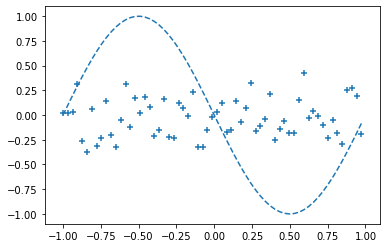

Epoch:0/2001 Error:0.27478946265238774


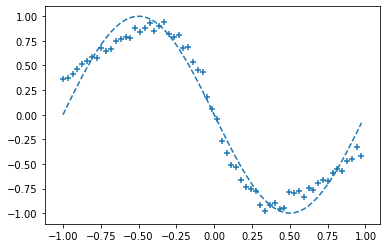

Epoch:200/2001 Error:0.009652144543148613


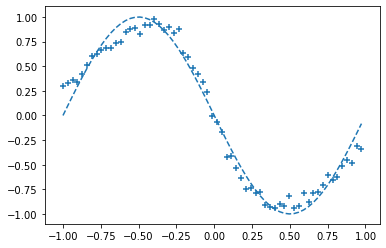

Epoch:400/2001 Error:0.006013398260369907


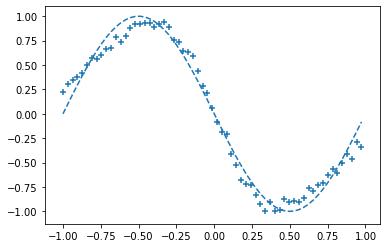

Epoch:600/2001 Error:0.005413829760650424


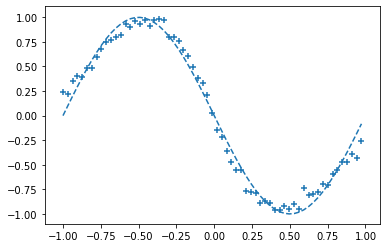

Epoch:800/2001 Error:0.004253651732035802


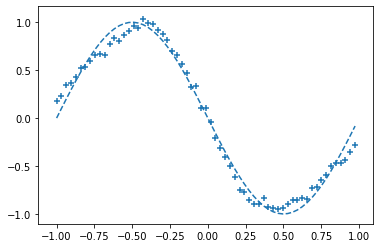

Epoch:1000/2001 Error:0.003944822329599712


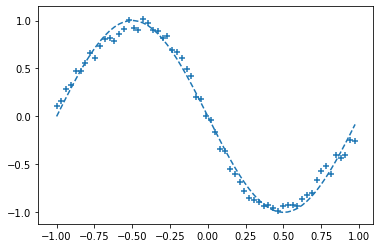

Epoch:1200/2001 Error:0.0025301471506619156


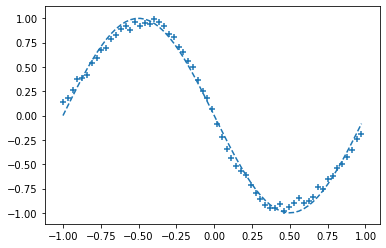

Epoch:1400/2001 Error:0.0018132386121150947


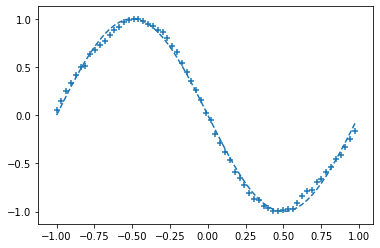

Epoch:1600/2001 Error:0.0008857365716537183


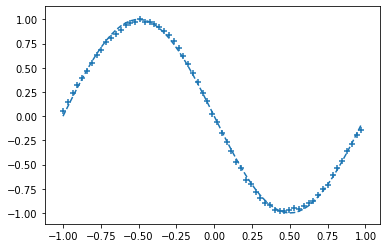

Epoch:1800/2001 Error:0.0003181629225603312


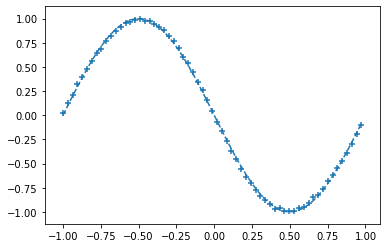

Epoch:2000/2001 Error:0.000132853644774609


In [27]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

input_data = np.arange(0, np.pi * 2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data-np.pi)/np.pi
n_data = len(correct_data)

n_in = 1
n_mid = 3
n_out = 1

wb_width = 0.01
eta = 0.1
epoch = 2001
interval = 200

middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += 1.0/2.0*np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x,plot_y,marker='+')
        plt.show()
        
        print('Epoch:' + str(i) + '/' + str(epoch), 'Error:' + str(total_error/n_data))

# 분류 문제 예시

Epoch:0/101 Error:0.7225518942122008


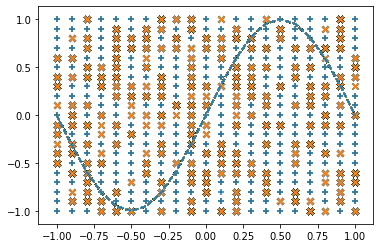

Epoch:10/101 Error:0.3211652660366076


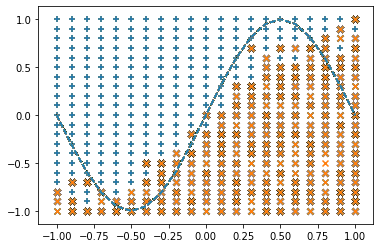

Epoch:20/101 Error:0.21948325194565557


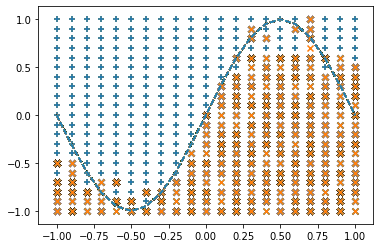

Epoch:30/101 Error:0.16138402895343443


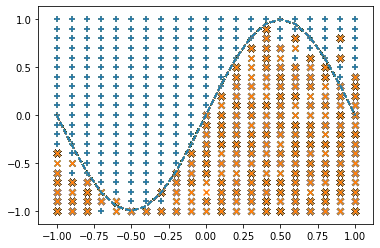

Epoch:40/101 Error:0.11950523686088924


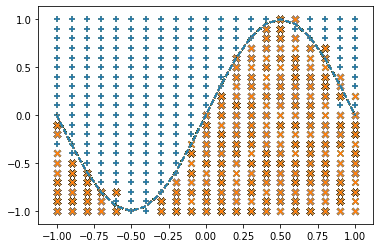

Epoch:50/101 Error:0.10090518729003152


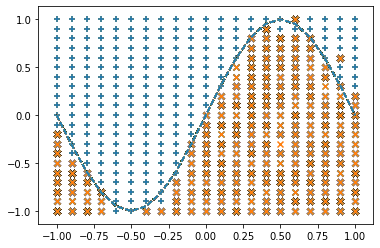

Epoch:60/101 Error:0.08460359096474619


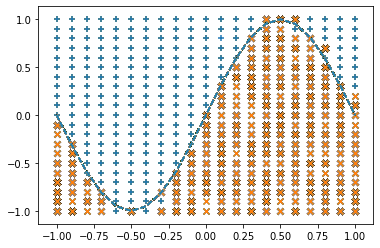

Epoch:70/101 Error:0.07631720893093992


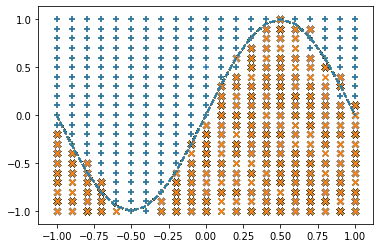

Epoch:80/101 Error:0.06755868178284653


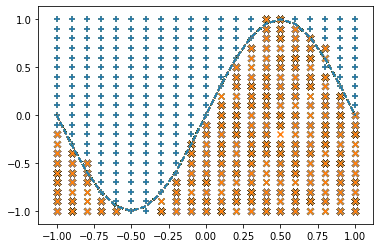

Epoch:90/101 Error:0.0774636586136906


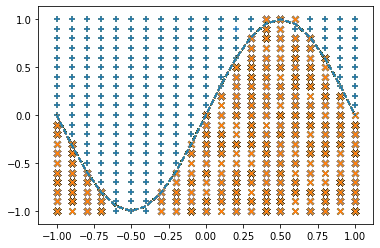

Epoch:100/101 Error:0.0668256100726984


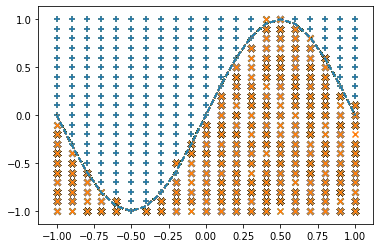

In [20]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1,keepdims=True)
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

        
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x,y])
        if y < np.sin(np.pi * x):
            correct_data.append([0,1])
        else:
            correct_data.append([1,0])

n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2
n_mid = 6
n_out = 2
wb_width = 0.01
eta = 0.1
epoch = 101
interval = 10

middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

sin_data = np.sin(np.pi * X)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)

            total_error += - np.sum(t * np.log(y + 1e-7))

            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])

        if i % interval == 0:
            plt.plot(X, sin_data, linestyle='dashed')
            plt.scatter(x_1,y_1, marker='+')
            plt.scatter(x_2,y_2, marker='x')
    
    if i % interval == 0:
        print('Epoch:' + str(i) + '/'+str(epoch), 'Error:'+str(total_error/n_data))
        plt.show()